In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('Houses.csv')

In [301]:
df.iloc[:, 70:].head()

,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,Remodelled_ago,Sold_ago,Garage_ago
0,WD,0,Pave,8,856.0,AllPub,0,0,9,0.0
1,WD,0,Pave,6,1262.0,AllPub,298,0,10,0.0
2,WD,0,Pave,6,920.0,AllPub,0,1,9,0.0
3,WD,0,Pave,7,756.0,AllPub,0,55,11,83.0
4,WD,0,Pave,9,1145.0,AllPub,192,0,9,0.0


In [302]:
df.Garage_ago = df.Garage_ago.astype('int32')
df.BsmtFullBath = df.BsmtFullBath.astype('int32')
df.BsmtHalfBath = df.BsmtHalfBath.astype('int32')
df.GarageCars = df.GarageCars.astype('int32')

In [3]:
df['BsmtFinSFtot'] = df.BsmtFinSF1 +  df.BsmtFinSF2 
del df['BsmtFinSF1']
del df['BsmtFinSF2']
df['FlrsSF'] = df['1stFlrSF'] +  df['2ndFlrSF'] 
del df['1stFlrSF']
del df['2ndFlrSF'] 

In [4]:
df['3SsnPorch1']= np.where(df['3SsnPorch'] > 0, 1, 0)
del df['3SsnPorch']
df['EnclosedPorch1']= np.where(df['EnclosedPorch'] > 0, 1, 0)
del df['EnclosedPorch']
df['MasVnrArea1'] = np.where(df['MasVnrArea'] == 0, 0, (np.where((df['MasVnrArea'] > 0) & (df['MasVnrArea'] < 200), 1,
                                                         (np.where((df['MasVnrArea'] > 200) & (df['MasVnrArea'] < 400), 2, 3)))))
del df['MasVnrArea'] 
df['OpenPorchSF1'] = np.where(df['OpenPorchSF'] == 0, 0, (np.where((df['OpenPorchSF'] > 0) & (df['OpenPorchSF'] <= 26), 1,
                                                         (np.where((df['OpenPorchSF'] > 26) & (df['OpenPorchSF'] <= 70), 2, 
                                                         (np.where((df['OpenPorchSF'] > 70) & (df['OpenPorchSF'] < 200), 3, 4)))))))
del df['OpenPorchSF']
df['LowQualFinSF1']= np.where(df['LowQualFinSF'] > 0, 1, 0)
del df['LowQualFinSF']
df['PoolArea1']= np.where(df['PoolArea'] > 0, 1, 0)
del df['PoolArea']
df['ScreenPorch1']= np.where(df['ScreenPorch'] > 0, 1, 0)
del df['ScreenPorch']
df['WoodDeckSF1'] = np.where(df['WoodDeckSF'] == 0, 0, (np.where((df['WoodDeckSF'] > 0) & (df['WoodDeckSF'] <= 170), 1,
                                                         (np.where((df['WoodDeckSF'] > 170) & (df['WoodDeckSF'] <= 400), 2, 3)))))
del df['WoodDeckSF']

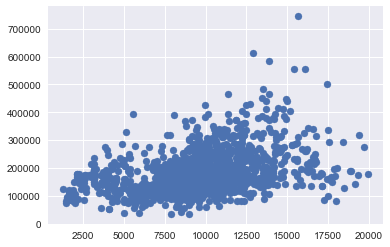

In [5]:
plt.scatter('LotArea', 'SalePrice', data = df[df.LotArea < 20000])
df['LotArea1'] = np.where(df['LotArea'] > 20000, 4, (np.where(df['LotArea'] > 12500, 3, 
                                                    (np.where(df['LotArea'] > 7500, 2, 
                                                    (np.where(df['LotArea'] > 5000, 1, 0)))))))

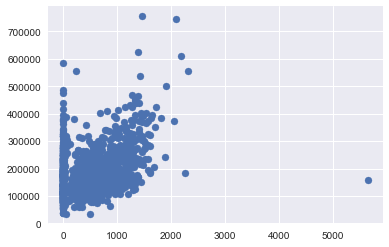

In [6]:
plt.scatter('BsmtFinSFtot', 'SalePrice', data = df)
df['BsmtFinSFtot1'] = np.where(df['BsmtFinSFtot'] > 2000, 3, (np.where(df['BsmtFinSFtot'] > 1000, 2, 
                                                    (np.where(df['BsmtFinSFtot'] > 0, 1, 0)))))


In [7]:
del df['BsmtFinSFtot']
del df['LotArea']

In [10]:
cond = ['ExterCond','ExterQual', 'GarageCond', 'GarageQual', 'HeatingQC', 'KitchenQual', 'PoolQC']
for i in cond:
    df[i] = df[i].replace(cond_dict)

In [9]:
#Newly assigned dictionaries (ANOVA-based)
cond_dict = { "Ex" : 5, "Gd" : 4, "TA" : 3, "Fa":2, "Po": 1, 'absent': 0 }
functional_dict = {"Typ" : 7, "Min1" : 6, "Min2" : 5, "Mod" : 4, "Maj1" : 3, "Maj2" : 2, "Sev" : 1, "Sal" : 0 }
garagefinish_dict  = {  "Fin" : 3, "RFn" : 2, "Unf" : 1, 'absent' : 0}
garagetype_dict = { "2Types" : 6, "Attchd" : 4, "Basment" : 3 , "BuiltIn" : 5, "CarPort" : 1, "Detchd" : 2 , 'absent': 0}
landcount_dict = { "Lvl" : 3, "Bnk" : 1 , "HLS" : 2 , "Low" : 0}
landslope_dict = {"Gtl" : 2, "Mod" : 1, "Sev" : 0}
lotshape_dict = {  "Reg" : 3, "IR1" : 2, "IR2" : 1, "IR3" : 0}
paveddrive_dict = {"Y" : 2, "P" : 1, "N" : 0}
street_dict = {"Grvl" : 0, "Pave" : 1}
utilities_dict = {"AllPub" : 1,  "NoSeWa" : 0}
masvnrtype_dict = {"BrkFace" : 1, "CBlock"  : 3, "absent" : 0, "BrkCmn" : 0, "Stone" : 2}
bsmt_dict = {"Gd" : 3, "Mn" :2, "Av" : 2, "No" : 1, "absent" : 0}
cond_firepla_bsmtcond = { "Ex" : 3, "Gd" : 2, "TA" : 1, 'absent' :0, 'Po':0, 'Fa': 0 }
bsmt_dict = {"Gd" : 4, "Av" : 3, "Mn" : 2, "No" : 1, "absent" : 0}

cond_basement_qual = { "Ex" : 5, "Gd" : 4, "TA" : 3, "Po": 1, 'absent' :0, "Fa": 0 }

df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_dict)
df['BsmtCond'] = df['BsmtCond'].map(cond_firepla_bsmtcond)
df['BsmtQual'] = df['BsmtQual'].map(cond_basement_qual)
df['FireplaceQu'] = df['FireplaceQu'].map(cond_firepla_bsmtcond)
df['MasVnrType'] = df['MasVnrType'].map(masvnrtype_dict)

In [11]:
df['Functional'] = df['Functional'].map(functional_dict)
df['GarageFinish'] = df['GarageFinish'].map(garagefinish_dict)
df['GarageType'] = df['GarageType'].map(garagetype_dict)
df['LandContour'] = df['LandContour'].map(landcount_dict)
df['LandSlope'] = df['LandSlope'].map(landslope_dict)
df['LotShape'] =  df['LotShape'].map(lotshape_dict)
df['PavedDrive'] = df['PavedDrive'].map(paveddrive_dict)
df.Street = df.Street.map(street_dict)
df.Utilities = df.Utilities.map(utilities_dict)
df.CentralAir = df.CentralAir.replace({'Y' : 1, "N" : 0})

In [12]:
for k in df.columns:
    if df[k].dtype == 'int64':
        df[k] =df[k].astype('int32')
    elif df[k].dtype == 'float64':
        df[k] =df[k].astype('float32')

In [13]:
cat1 = ['BsmtCond', 'BsmtExposure', 'BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu', 'GarageCond', 'GarageQual', 'HalfBath',
        'HeatingQC', 'KitchenQual', 'MasVnrType', 'PoolQC', 'LotArea1']
for i in cat1:
    df[i] = df[i].astype('category')

In [14]:
categories = ['CentralAir', 'KitchenAbvGr', 'MSSubClass', 'MiscVal', 'MoSold', 'OverallCond', 'OverallQual', 'Alley', 
              'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition2',
              'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
              'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 
              'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 
              'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities',
              '3SsnPorch1', 'EnclosedPorch1', 'LowQualFinSF1', 'MasVnrArea1', 'OpenPorchSF1', 'PoolArea1', 'ScreenPorch1', 
              'WoodDeckSF1', 'BsmtFinSFtot1']
floats = ['FlrsSF', 'GrLivArea']
for i in categories:
    df[i] = df[i].astype('category')
for j in floats:
    df[j] = df[j].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
Alley             2919 non-null category
BedroomAbvGr      2919 non-null int32
BldgType          2919 non-null category
BsmtCond          2919 non-null category
BsmtExposure      2919 non-null category
BsmtFinType1      2919 non-null category
BsmtFinType2      2919 non-null category
BsmtFullBath      2919 non-null float32
BsmtHalfBath      2919 non-null float32
BsmtQual          2919 non-null category
BsmtUnfSF         2919 non-null float32
CentralAir        2919 non-null category
Condition1        2919 non-null category
Condition2        2919 non-null category
Electrical        2919 non-null category
ExterCond         2919 non-null category
ExterQual         2919 non-null category
Exterior1st       2919 non-null category
Exterior2nd       2919 non-null category
Fence             2919 non-null category
FireplaceQu       2919 non-null category
Fireplaces        2919 non-null int32


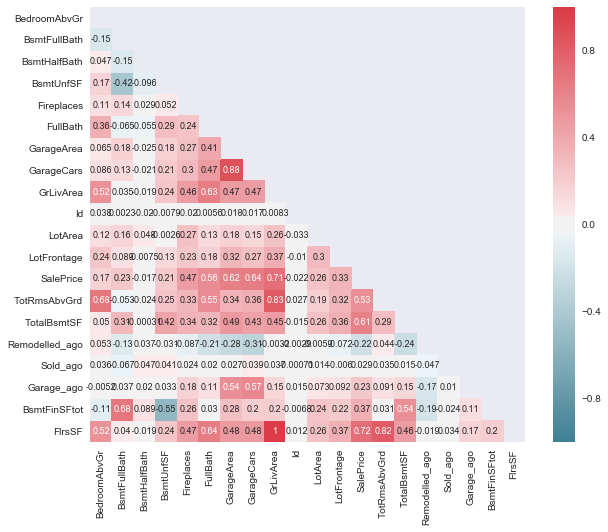

In [293]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.dropna().corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,  mask= mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True, annot_kws={"size":9})

# Categoricals to dummies

In [16]:
df_cat = df[['Alley', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1', 'Condition2', 'Electrical', 
             'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'Heating', 'HouseStyle', 'LotConfig', 'MSSubClass', 
             'MSZoning', 'MiscFeature', 'MoSold', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']]

In [17]:
df_cat.head()

,Alley,BldgType,BsmtFinType1,BsmtFinType2,Condition1,Condition2,Electrical,Exterior1st,Exterior2nd,Fence,...,LotConfig,MSSubClass,MSZoning,MiscFeature,MoSold,Neighborhood,RoofMatl,RoofStyle,SaleCondition,SaleType
0,absent,1Fam,GLQ,Unf,Norm,Norm,SBrkr,VinylSd,VinylSd,absent,...,Inside,60,RL,absent,2,CollgCr,CompShg,Gable,Normal,WD
1,absent,1Fam,ALQ,Unf,Feedr,Norm,SBrkr,MetalSd,MetalSd,absent,...,FR2,20,RL,absent,5,Veenker,CompShg,Gable,Normal,WD
2,absent,1Fam,GLQ,Unf,Norm,Norm,SBrkr,VinylSd,VinylSd,absent,...,Inside,60,RL,absent,9,CollgCr,CompShg,Gable,Normal,WD
3,absent,1Fam,ALQ,Unf,Norm,Norm,SBrkr,Wd Sdng,Wd Shng,absent,...,Corner,70,RL,absent,2,Crawfor,CompShg,Gable,Abnorml,WD
4,absent,1Fam,GLQ,Unf,Norm,Norm,SBrkr,VinylSd,VinylSd,absent,...,FR2,60,RL,absent,12,NoRidge,CompShg,Gable,Normal,WD


In [336]:
Alley_enc = pd.get_dummies(df_cat.Alley, prefix = 'Alley') #, drop_first = True)
BldgType_enc = pd.get_dummies(df_cat.BldgType, prefix = 'BldgType')
BsmtFinType1_enc = pd.get_dummies(df_cat.BsmtFinType1, prefix = 'BsmtFinType1')
BsmtFinType2_enc = pd.get_dummies(df_cat.BsmtFinType2, prefix = 'BsmtFinType2')
Condition1_enc = pd.get_dummies(df_cat.Condition1, prefix = 'Condition1')
Condition2_enc = pd.get_dummies(df_cat.Condition2, prefix = 'Condition2')
Electrical_enc = pd.get_dummies(df_cat.Electrical, prefix = 'Electrical')
Exterior1st_enc = pd.get_dummies(df_cat.Exterior1st, prefix = 'Exterior1st')
Exterior2nd_enc = pd.get_dummies(df_cat.Exterior2nd, prefix = 'Exterior2nd')
Fence_enc = pd.get_dummies(df_cat.Fence, prefix = 'Fence')
Foundation_enc = pd.get_dummies(df_cat.Foundation, prefix = 'Foundation')
Heating_enc = pd.get_dummies(df_cat.Heating, prefix = 'Heating')
HouseStyle_enc = pd.get_dummies(df_cat.HouseStyle, prefix = 'HouseStyle')
LotConfig_enc = pd.get_dummies(df_cat.LotConfig, prefix = 'LotConfig')
MSSubClass_enc = pd.get_dummies(df_cat.MSSubClass, prefix = 'MSSubClass')
MSZoning_enc = pd.get_dummies(df_cat.MSZoning, prefix = 'MSZoning')
MiscFeature_enc = pd.get_dummies(df_cat.MiscFeature, prefix = 'MiscFeature')
MoSold_enc = pd.get_dummies(df_cat.MoSold, prefix = 'MoSold')
Neighborhood_enc = pd.get_dummies(df_cat.Neighborhood, prefix = 'Neighborhood')
RoofMatl_enc = pd.get_dummies(df_cat.RoofMatl, prefix = 'RoofMatl')
RoofStyle_enc = pd.get_dummies(df_cat.RoofStyle, prefix = 'RoofStyle')
SaleCondition_enc = pd.get_dummies(df_cat.SaleCondition, prefix = 'SaleCondition')
SaleType_enc = pd.get_dummies(df_cat.SaleType, prefix = 'SaleType')

In [19]:
Alley_enc = pd.get_dummies(df_cat.Alley, prefix = 'Alley', drop_first = True)
BldgType_enc = pd.get_dummies(df_cat.BldgType, prefix = 'BldgType', drop_first = True)
BsmtFinType1_enc = pd.get_dummies(df_cat.BsmtFinType1, prefix = 'BsmtFinType1', drop_first = True)
BsmtFinType2_enc = pd.get_dummies(df_cat.BsmtFinType2, prefix = 'BsmtFinType2', drop_first = True)
Condition1_enc = pd.get_dummies(df_cat.Condition1, prefix = 'Condition1', drop_first = True)
Condition2_enc = pd.get_dummies(df_cat.Condition2, prefix = 'Condition2', drop_first = True)
Electrical_enc = pd.get_dummies(df_cat.Electrical, prefix = 'Electrical', drop_first = True)
Exterior1st_enc = pd.get_dummies(df_cat.Exterior1st, prefix = 'Exterior1st', drop_first = True)
Exterior2nd_enc = pd.get_dummies(df_cat.Exterior2nd, prefix = 'Exterior2nd', drop_first = True)
Fence_enc = pd.get_dummies(df_cat.Fence, prefix = 'Fence', drop_first = True)
Foundation_enc = pd.get_dummies(df_cat.Foundation, prefix = 'Foundation', drop_first = True)
Heating_enc = pd.get_dummies(df_cat.Heating, prefix = 'Heating', drop_first = True)
HouseStyle_enc = pd.get_dummies(df_cat.HouseStyle, prefix = 'HouseStyle', drop_first = True)
LotConfig_enc = pd.get_dummies(df_cat.LotConfig, prefix = 'LotConfig', drop_first = True)
MSSubClass_enc = pd.get_dummies(df_cat.MSSubClass, prefix = 'MSSubClass', drop_first = True)
MSZoning_enc = pd.get_dummies(df_cat.MSZoning, prefix = 'MSZoning', drop_first = True)
MiscFeature_enc = pd.get_dummies(df_cat.MiscFeature, prefix = 'MiscFeature', drop_first = True)
MoSold_enc = pd.get_dummies(df_cat.MoSold, prefix = 'MoSold', drop_first = True)
Neighborhood_enc = pd.get_dummies(df_cat.Neighborhood, prefix = 'Neighborhood', drop_first = True)
RoofMatl_enc = pd.get_dummies(df_cat.RoofMatl, prefix = 'RoofMatl', drop_first = True)
RoofStyle_enc = pd.get_dummies(df_cat.RoofStyle, prefix = 'RoofStyle', drop_first = True)
SaleCondition_enc = pd.get_dummies(df_cat.SaleCondition, prefix = 'SaleCondition', drop_first = True)
SaleType_enc = pd.get_dummies(df_cat.SaleType, prefix = 'SaleType', drop_first = True)

In [20]:
df_d = pd.concat([Alley_enc, BldgType_enc, BsmtFinType1_enc, BsmtFinType2_enc, Condition1_enc, Condition2_enc, 
            Electrical_enc, Exterior1st_enc, Exterior2nd_enc, Fence_enc, Foundation_enc, Heating_enc,
            HouseStyle_enc, LotConfig_enc, MSSubClass_enc, MSZoning_enc, MiscFeature_enc, MoSold_enc, 
            Neighborhood_enc, RoofMatl_enc, RoofStyle_enc, SaleCondition_enc, SaleType_enc] , axis = 1)

In [338]:
df_d.head()

,Alley_Grvl,Alley_Pave,Alley_absent,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType1_ALQ,BsmtFinType1_BLQ,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [339]:
#to stay ,,,, ?????BsmtFinType1_Rec and Heating_GasA
df_d = df_d[['Alley_Grvl', 'BldgType_1Fam', 'BldgType_TwnhsE', 'BsmtFinType1_absent', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf',
'BsmtFinType1_Rec', 'BsmtFinType2_absent', 'Condition1_Feedr', 'Condition1_PosN', 'Electrical_SBrkr', 'Exterior1st_AsbShng',
'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_VinylSd', 'Exterior2nd_AsbShng', 'Exterior2nd_CmentBd',
'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd', 'Fence_absent', 'Foundation_PConc', 'Foundation_Slab', 'Heating_GasA',
'HouseStyle_2Story', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'LotConfig_CulDSac', 'MSSubClass_60', 'MSSubClass_120',
'MSSubClass_20', 'MSSubClass_30', 'MSZoning_FV', 'MSZoning_RL', 'Neighborhood_Sawyer', 'Neighborhood_SWISU',
'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_NWAmes', 'Neighborhood_NPkVill',
'Neighborhood_NAmes', 'Neighborhood_Mitchel', 'Neighborhood_MeadowV', 'Neighborhood_IDOTRR', 'Neighborhood_Gilbert',
'Neighborhood_Edwards', 'Neighborhood_CollgCr', 'Neighborhood_BrDale', 'Neighborhood_Blmngtn', 'RoofMatl_WdShngl',
'RoofStyle_Hip', 'SaleCondition_Partial', 'SaleCondition_Normal', 'SaleType_New']]
len(df_d.columns)

54

# Grouping categorical variables by difference in Means

In [144]:
df_l = df.dropna()
list_dum1 = ['Alley', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1','Condition2', 
            'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'Heating',
            'HouseStyle', 'LotConfig', 'MSSubClass', 'MSZoning', 'MiscFeature', 'MoSold', 
            'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']
for i in list_dum1:
    print(i)
    print(pairwise_tukeyhsd(df_l.SalePrice, df_l[i]))

Alley
  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
 Grvl   Pave  45781.5054  6888.5948  84674.4159  True 
 Grvl  absent 61233.0515  34654.5097 87811.5933  True 
 Pave  absent 15451.5461 -13806.3156 44709.4078 False 
------------------------------------------------------
BldgType
   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
 1Fam  2fmCon -57331.5493 -96158.8945 -18504.2041  True 
 1Fam  Duplex -52222.7305 -82452.2867 -21993.1742  True 
 1Fam  Twnhs  -49852.1795  -82977.29  -16727.0689  True 
 1Fam  TwnhsE  -3804.4653 -24712.6042  17103.6737 False 
2fmCon Duplex  5108.8189   -43333.657  53551.2947 False 
2fmCon Twnhs   7479.3698  -42820.9318  57779.6714 False 
2fmCon TwnhsE  53527.084   10283.6144  96770.5537  True 
Duplex Twnhs    2370.551  -416

    Multiple Comparison of Means - Tukey HSD,FWER=0.05    
group1 group2   meandiff      lower        upper    reject
----------------------------------------------------------
Floor   GasA  109521.1954  -115990.1434 335032.5342 False 
Floor   GasW   94132.1667  -137477.6274 325741.9608 False 
Floor   Grav   2771.4286   -238225.9652 243768.8224 False 
Floor   OthW    53250.0    -222847.1998 329347.1998 False 
Floor   Wall    19600.0    -232441.1074 271641.1074 False 
 GasA   GasW  -15389.0287  -68857.7949   38079.7375 False 
 GasA   Grav  -106749.7668 -192163.7941 -21335.7395  True 
 GasA   OthW  -56271.1954  -215787.577  103245.1862 False 
 GasA   Wall  -89921.1954  -202795.1607  22952.7699 False 
 GasW   Grav  -91360.7381  -191776.3188  9054.8427  False 
 GasW   OthW  -40882.1667  -208909.5716 127145.2382 False 
 GasW   Wall  -74532.1667  -199144.6253  50080.2919 False 
 Grav   OthW   50478.5714  -130269.4739 231226.6168 False 
 Grav   Wall   16828.5714  -124468.6753 158125.8182 Fals

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
 group1  group2   meandiff      lower        upper     reject
-------------------------------------------------------------
Blmngtn Blueste -57370.8824  -205327.1494  90585.3847  False 
Blmngtn  BrDale -90377.1324  -159316.6978 -21437.5669   True 
Blmngtn BrkSide -70036.8306  -124623.7013  -15449.96    True 
Blmngtn ClearCr  17694.5462  -43160.8093   78549.9018  False 
Blmngtn CollgCr   3094.891   -47555.6594   53745.4414  False 
Blmngtn Crawfor  15753.8431   -39675.653   71183.3393  False 
Blmngtn Edwards -66651.1824  -118574.7463 -14727.6184   True 
Blmngtn Gilbert  -2016.376   -54933.1834   50900.4313  False 
Blmngtn  IDOTRR -94747.0986  -152739.031  -36755.1661   True 
Blmngtn MeadowV -96294.4118  -164181.4029 -28407.4206   True 
Blmngtn Mitchel -38600.7599  -94312.3419   17110.8221  False 
Blmngtn  NAmes  -49023.8024  -98807.5959    759.9912   False 
Blmngtn NPkVill -52176.4379  -133766.4471  29413.5713  False 
Blmngtn 

In [23]:
df_d.SalePrice = df.SalePrice

In [210]:
num_cat = ['BedroomAbvGr', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'CentralAir', 'ExterCond',
'ExterQual', 'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
'GarageType', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotShape', 'MasVnrType' ,
'MiscVal', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolQC', 'SalePrice', 'Street', 'TotRmsAbvGrd', 'Utilities', '3SsnPorch1',
'EnclosedPorch1', 'MasVnrArea1', 'OpenPorchSF1', 'LowQualFinSF1', 'PoolArea1', 'ScreenPorch1', 'WoodDeckSF1']
df_num_cat = df_num_cat.dropna()
for i in num_cat: 
    print(i)
    print(pairwise_tukeyhsd(df_num_cat.SalePrice, df_num_cat[i]))

BedroomAbvGr
    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower        upper    reject
---------------------------------------------------------
  0      1    -48330.7467 -149653.3562  52991.8628 False 
  0      2    -63295.5074 -159835.3383  33244.3234 False 
  0      3     -40436.296 -136533.7408  55661.1487 False 
  0      4     -1071.9131  -98151.878   96008.0517 False 
  0      5     -40674.119 -149234.0578  67885.8197 False 
  0      6    -77714.1667 -208186.9752  52758.6419 False 
  0      8    -21493.1667 -274799.6904  231813.357 False 
  1      2    -14964.7608 -50370.7348   20441.2132 False 
  1      3     7894.4506   -26286.874   42075.7753 False 
  1      4     47258.8335  10405.5617   84112.1053  True 
  1      5     7656.6276  -53326.1926   68639.4478 False 
  1      6     -29383.42  -124023.7805  65256.9405 False 
  1      8      26837.58  -210012.2438 263687.4038 False 
  2      3     22859.2114  7958.5171    37759.9058  True 
 

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
  0      1    -10640.1765 -58775.9792  37495.6263 False 
  0      2     47733.6288  36964.8881  58502.3695  True 
  0      3    108625.3819  91129.0481 126121.7156  True 
  1      2     58373.8052  9849.0267  106898.5838  True 
  1      3    119265.5583  68819.448  169711.6687  True 
  2      3     60891.7531  42352.0574  79431.4488  True 
--------------------------------------------------------
MiscVal
    Multiple Comparison of Means - Tukey HSD,FWER=0.05    
group1 group2   meandiff      lower        upper    reject
----------------------------------------------------------
  0      54   -125971.7038 -410185.7578 158242.3502 False 
  0     350    18035.2962  -266178.7578 302249.3502 False 
  0     400   -33023.7947  -119021.1129  52973.5234 False 
  0     450   -65527.2038  -207785.4354  76731.0277 False 
  0     4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [114]:
#cl = [x for x in range(0, len(list_dum)+1)]
row_ = [0] + [i for l in [[0]*2, [1]*2, [2]*2, [3]*2, [4]*2, [5]*2, [6]*2, [7]*2, [8]*2, [9]*2, [10]*2, [11]*2] for i in l]
col_ = [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

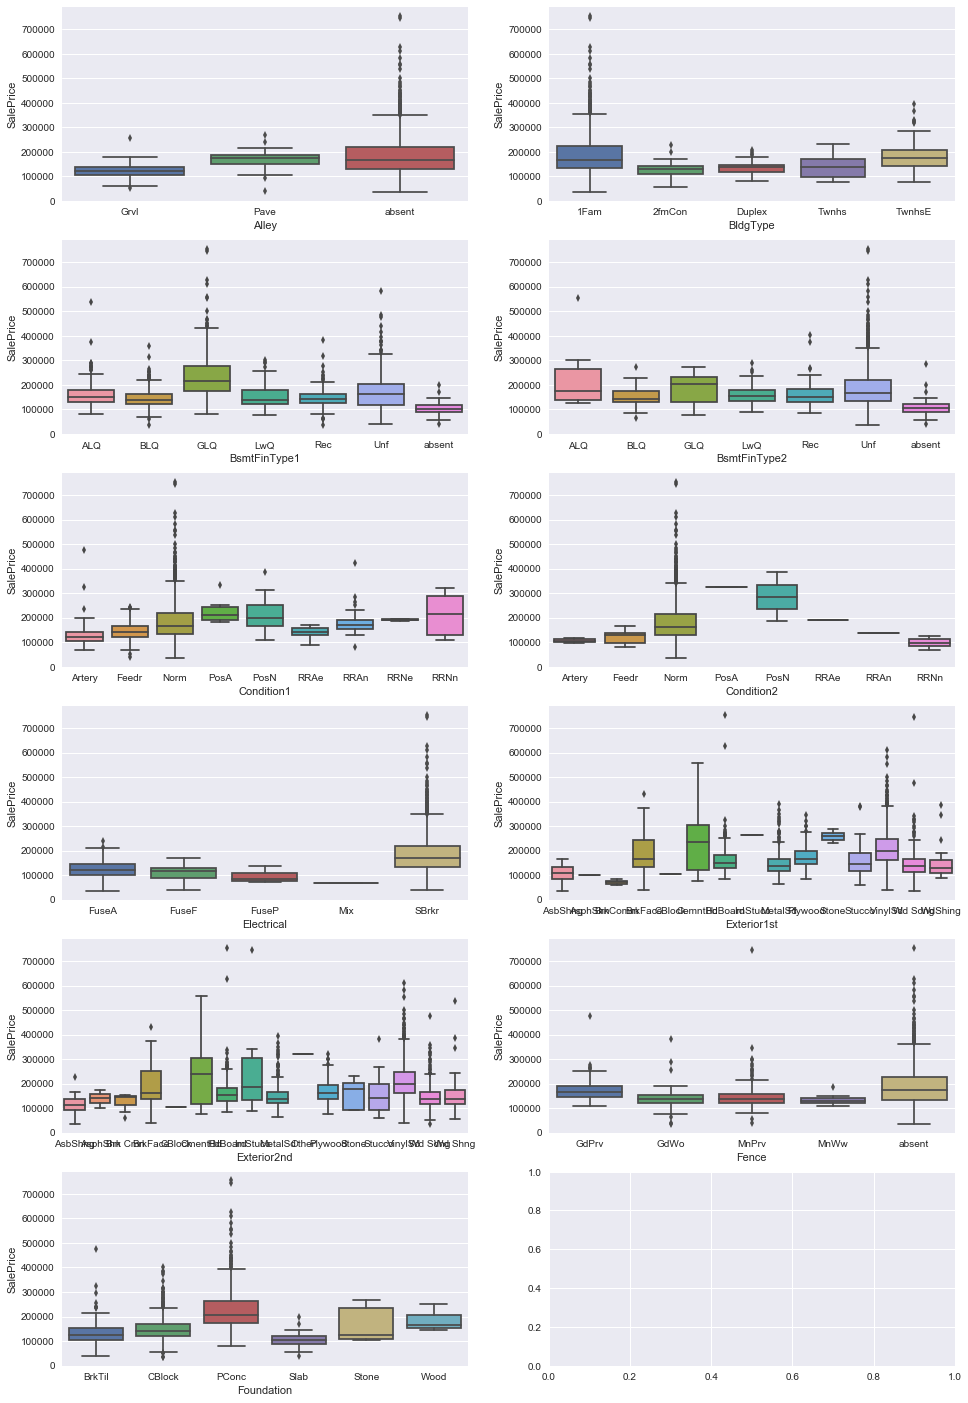

In [120]:
list_dum = [0, 'Alley', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1','Condition2', 
            'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation']
fix, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 25), squeeze=False)
for i in range(1,12):
    sns.boxplot(x = list_dum[i], y = 'SalePrice', data = df, ax = axes[row_[i], col_[i]])

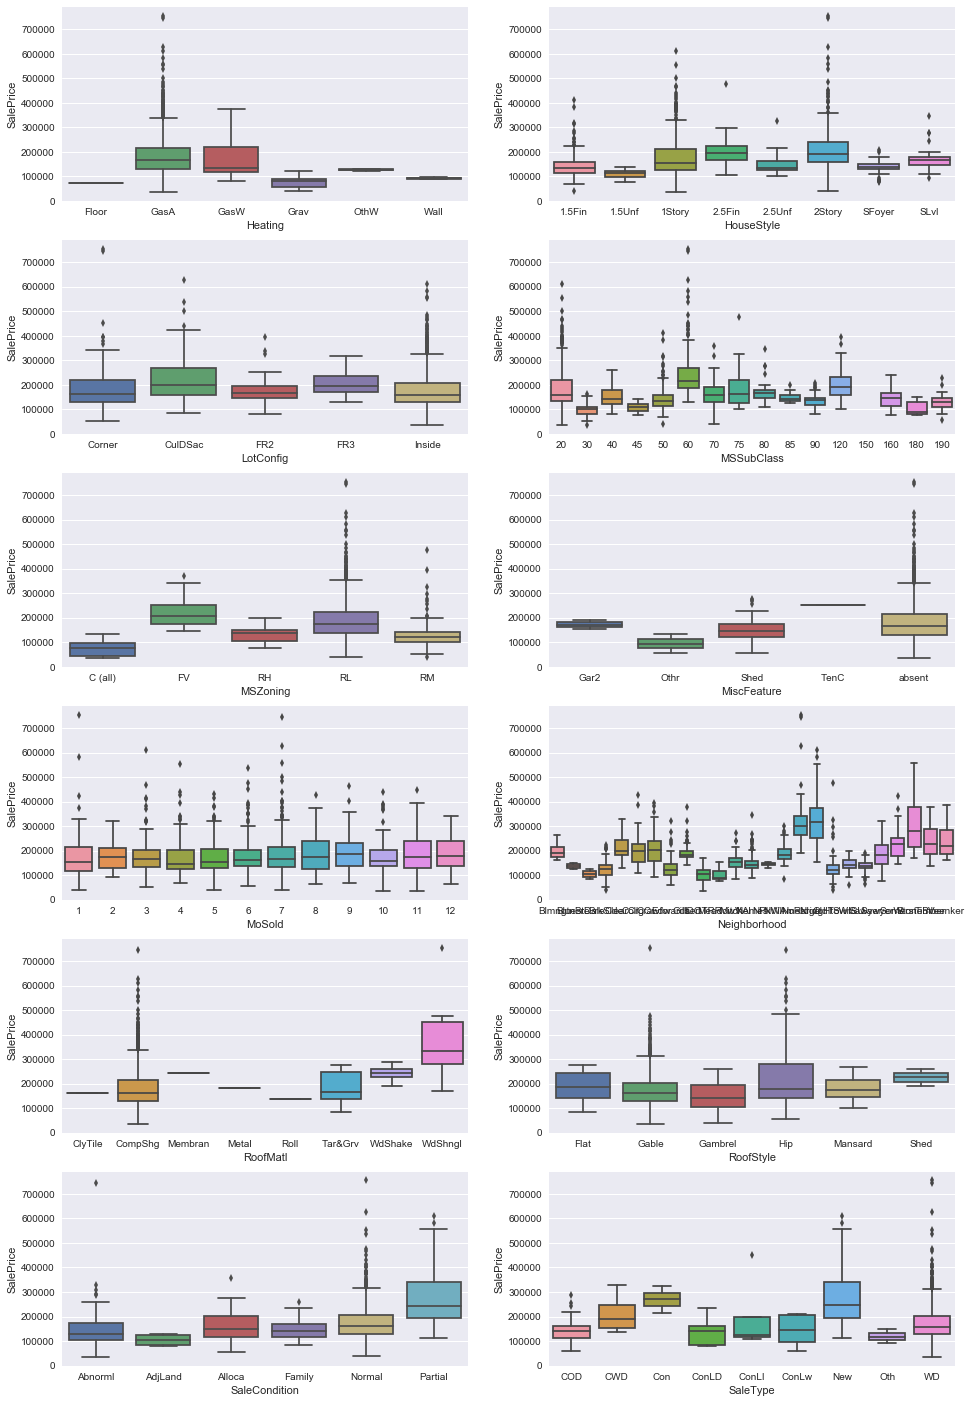

In [121]:
list_dum = [0, 'Heating', 'HouseStyle', 'LotConfig', 'MSSubClass', 'MSZoning', 'MiscFeature', 
            'MoSold', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']
fix, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 25), squeeze=False)
for i in range(1,13):
    sns.boxplot(x = list_dum[i], y = 'SalePrice', data = df, ax = axes[row_[i], col_[i]])

In [21]:
col = df_cat.columns.tolist()
df1 = df.drop(col, axis = 1)
df1.head()

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,ExterCond,ExterQual,...,3SsnPorch1,EnclosedPorch1,MasVnrArea1,OpenPorchSF1,LowQualFinSF1,PoolArea1,ScreenPorch1,WoodDeckSF1,LotArea1,BsmtFinSFtot1
0,3,1,1,1.0,0.0,4,150.0,1,3,4,...,0,0,1,2,0,0,0,0,2,1
1,3,1,4,0.0,1.0,4,284.0,1,3,3,...,0,0,0,0,0,0,0,2,2,1
2,3,1,2,1.0,0.0,4,434.0,1,3,4,...,0,0,1,2,0,0,0,0,2,1
3,3,2,1,1.0,0.0,3,540.0,1,3,3,...,0,1,0,2,0,0,0,0,2,1
4,4,1,3,1.0,0.0,4,490.0,1,3,4,...,0,0,2,3,0,0,0,2,3,1


In [22]:
df_float = df.loc[:, df.dtypes == np.float32].drop('SalePrice', axis = 1)
df_int = df.loc[:, df.dtypes == np.int32]

In [23]:
df_f =pd.concat([df1, df_d], axis = 1)

In [24]:
df_f.head()

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,ExterCond,ExterQual,...,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,3,1,1,1.0,0.0,4,150.0,1,3,4,...,1,0,0,0,0,0,0,0,0,1
1,3,1,4,0.0,1.0,4,284.0,1,3,3,...,1,0,0,0,0,0,0,0,0,1
2,3,1,2,1.0,0.0,4,434.0,1,3,4,...,1,0,0,0,0,0,0,0,0,1
3,3,2,1,1.0,0.0,3,540.0,1,3,3,...,0,0,0,0,0,0,0,0,0,1
4,4,1,3,1.0,0.0,4,490.0,1,3,4,...,1,0,0,0,0,0,0,0,0,1


In [25]:
house_test = df_f[df_f.SalePrice.isnull()]
house_test.to_csv("House_test_all_dum.csv", index = False)

In [26]:
house_train = df_f[df_f.SalePrice.notnull()]
house_train.to_csv("House_train_all_dum.csv", index = False)

# Numeric variables exploration

In [21]:
df2.head()

,BsmtUnfSF,GarageArea,GrLivArea,LotArea,LotFrontage,TotalBsmtSF,SalePrice
0,150.0,548.0,1710.0,8450.0,65.0,856.0,208500.0
1,284.0,460.0,1262.0,9600.0,80.0,1262.0,181500.0
2,434.0,608.0,1786.0,11250.0,68.0,920.0,223500.0
3,540.0,642.0,1717.0,9550.0,60.0,756.0,140000.0
4,490.0,836.0,2198.0,14260.0,84.0,1145.0,250000.0


In [13]:
#df1.iloc[:, 40:50].head()

In [14]:
#df2.iloc[1459:,]

# Multicollinearity detection

In [90]:
#GrLivArea, BsmtFinSFtot, BsmtUnfSF, TotalBsmtSF removed as multicollinear SoldAgo, Lot Area, LotFrontage - insignificant
df2 = df[['FlrsSF', 'GarageArea', 'Remodelled_ago', 'Garage_ago', 'SalePrice']]

In [74]:
df2.corr()

,BsmtFinSFtot,FlrsSF,BsmtUnfSF,GarageArea,LotArea,LotFrontage,TotalBsmtSF,Remodelled_ago,Sold_ago,Garage_ago,SalePrice
BsmtFinSFtot,1.000000,0.202980,-0.539578,0.297733,0.215195,0.206462,0.544106,-0.216540,-0.024624,0.121555,0.366328
FlrsSF,0.202980,1.000000,0.231169,0.492663,0.285809,0.349473,0.449954,-0.042274,0.026838,0.136365,0.716883
BsmtUnfSF,-0.539578,0.231169,1.000000,0.164717,0.021590,0.106381,0.412810,-0.020696,0.038073,0.005502,0.214479
GarageArea,0.297733,0.492663,0.164717,1.000000,0.213249,0.338014,0.486237,-0.277720,0.013457,0.522270,0.623431
LotArea,0.215195,0.285809,0.021590,0.213249,1.000000,0.361426,0.254316,-0.011605,0.024234,0.073262,0.263843
LotFrontage,0.206462,0.349473,0.106381,0.338014,0.361426,1.000000,0.329365,-0.070668,0.007562,0.092920,0.334544
TotalBsmtSF,0.544106,0.449954,0.412810,0.486237,0.254316,0.329365,1.000000,-0.254880,0.011302,0.136983,0.613581
Remodelled_ago,-0.216540,-0.042274,-0.020696,-0.277720,-0.011605,-0.070668,-0.254880,1.000000,-0.044366,-0.153183,-0.217503
Sold_ago,-0.024624,0.026838,0.038073,0.013457,0.024234,0.007562,0.011302,-0.044366,1.000000,0.009829,0.028923
Garage_ago,0.121555,0.136365,0.005502,0.522270,0.073262,0.092920,0.136983,-0.153183,0.009829,1.000000,0.230246


In [91]:
df2n = df2.dropna()
import statsmodels.formula.api as sm
model1 = sm.ols(formula='SalePrice ~ FlrsSF + GarageArea  + Remodelled_ago + Garage_ago', data=df2n)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     625.8
Date:                Tue, 13 Feb 2018   Prob (F-statistic):          2.83e-314
Time:                        16:34:49   Log-Likelihood:                -17813.
No. Observations:                1460   AIC:                         3.564e+04
Df Residuals:                    1455   BIC:                         3.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6992.7165   4588.907     -1.524      0.128    -1.6e+04    2008.863
FlrsSF            83.9366      2.807     29.904      0.000      78.431      89.443
GarageArea       137.2964      8.215     16.713      0.000     121.182     153.410
Remodelled_ago  -380.9433     54.192     -7.030      0.000    -487.246    -274.641
Garage_ago       -14.0764      3.380     -4.164      0.000     -20.707      -7.446
==============================================================================
Omnibus:                      315.965   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11671.837
Skew:                           0.027   Prob(JB):                         0.00
Kurtosis:                      16.851   Cond. No.                     6.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#VIF Calculation
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [93]:
# no severe multicollinearity detected
vif_cal(input_data=df2n, dependent_col="SalePrice")

FlrsSF  VIF =  1.34
GarageArea  VIF =  1.93
Remodelled_ago  VIF =  1.1
Garage_ago  VIF =  1.43


In [94]:
df3 = df.drop(['BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotArea', 'LotFrontage', 'TotalBsmtSF',
              'Alley', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1', 'Condition2', 
            'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'Heating',
            'HouseStyle', 'LotConfig', 'MSSubClass', 'MSZoning', 'MiscFeature', 'MoSold', 'Remodelled_ago', 'Sold_ago', 'Garage_ago',
            'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'BsmtFinSFtot', 'FlrsSF', 'Id'], axis = 1)

In [21]:
df3.iloc[:, 1:15].head()

NameError: name 'df3' is not defined

In [105]:
df4 = df[categories].drop()

In [141]:
df4 = house_train.drop(['GrLivArea', 'BsmtFinSFtot', 'BsmtUnfSF', 'TotalBsmtSF', 'LotArea', 'LotFrontage', 
              'FlrsSF', 'GarageArea', 'Remodelled_ago', 'Garage_ago'], axis = 1)

In [150]:
df3n = df3.dropna()
import statsmodels.formula.api as sm
model1 = sm.ols(formula='SalePrice ~ FlrsSF + GarageArea  + Remodelled_ago + Garage_ago', data=df2n)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     625.8
Date:                Tue, 13 Feb 2018   Prob (F-statistic):          2.83e-314
Time:                        18:43:03   Log-Likelihood:                -17813.
No. Observations:                1460   AIC:                         3.564e+04
Df Residuals:                    1455   BIC:                         3.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6992.7165   4588.907     -1.524      0.128    -1.6e+04    2008.863
FlrsSF            83.9366      2.807     29.904      0.000      78.431      89.443
GarageArea       137.2964      8.215     16.713      0.000     121.182     153.410
Remodelled_ago  -380.9433     54.192     -7.030      0.000    -487.246    -274.641
Garage_ago       -14.0764      3.380     -4.164      0.000     -20.707      -7.446
==============================================================================
Omnibus:                      315.965   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11671.837
Skew:                           0.027   Prob(JB):                         0.00
Kurtosis:                      16.851   Cond. No.                     6.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df4_fig = sns.PairGrid(df4)
df4_fig.map_upper(plt.scatter,color='purple')

KeyboardInterrupt: 

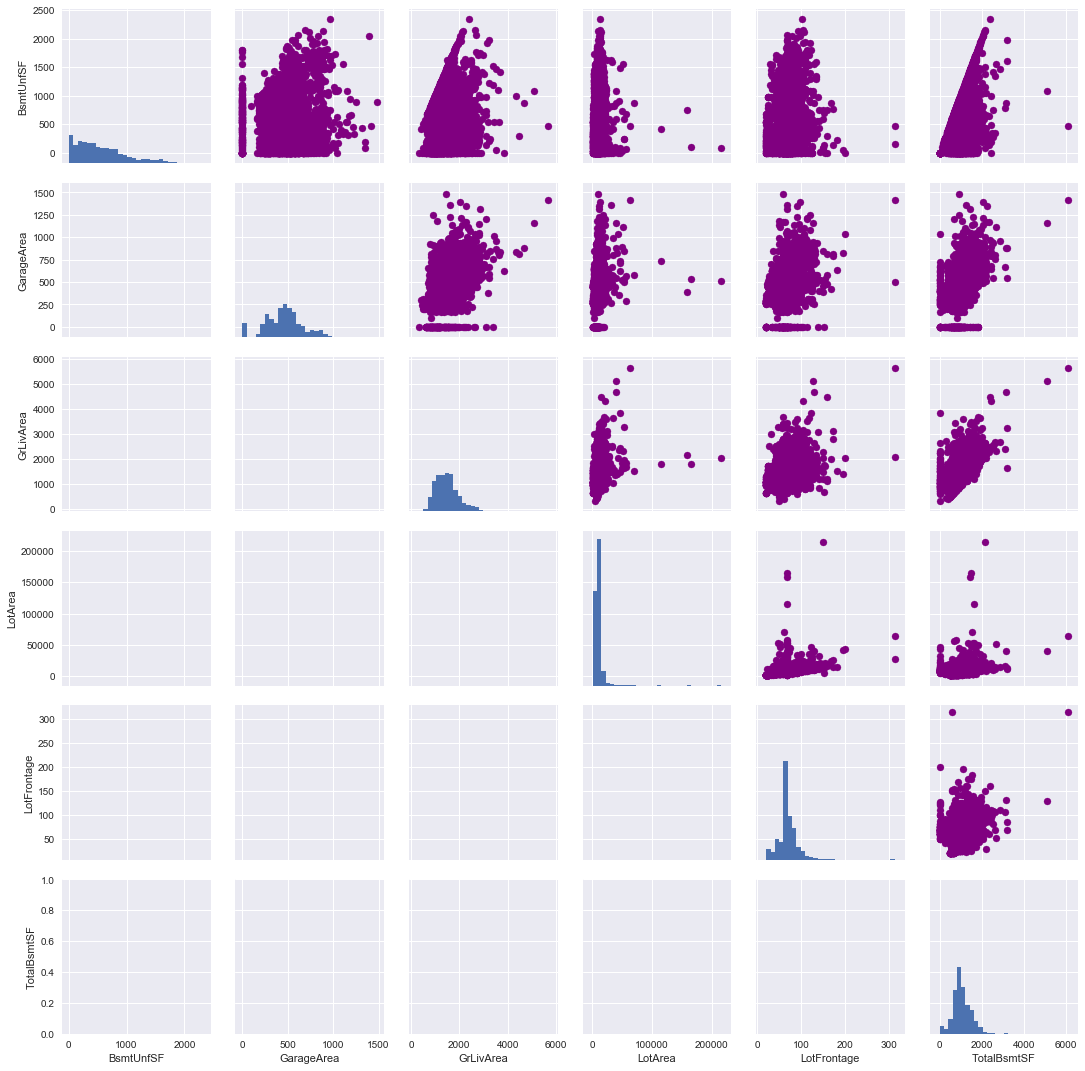

In [18]:
df3_fig = sns.PairGrid(df2.iloc[:, :-1])
df3_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
#df3_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
df3_fig.map_diag(plt.hist,bins=30)

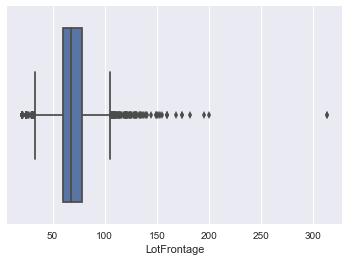

In [164]:
sns.boxplot('LotFrontage', data = df1) #convert to categorical